<a href="https://colab.research.google.com/github/guimaraaes/eng_computacao-ufersa/blob/master/4g_teleco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore') 
sns.set_theme()

In [ ]:
municipios = pd.read_csv('https://raw.githubusercontent.com/guimaraaes/data-science/master/data/4g-networks/municipios.csv')
regiaoI = pd.read_csv('https://raw.githubusercontent.com/guimaraaes/data-science/master/data/4g-networks/regiaoI.csv')
regiaoII = pd.read_csv('https://raw.githubusercontent.com/guimaraaes/data-science/master/data/4g-networks/regiao2.csv')
regiaoIII = pd.read_csv('https://raw.githubusercontent.com/guimaraaes/data-science/master/data/4g-networks/regiao3.csv')
operadoras = pd.read_csv('https://raw.githubusercontent.com/guimaraaes/data-science/master/data/4g-networks/operadoras.csv')
estado = pd.read_csv('https://raw.githubusercontent.com/guimaraaes/data-science/master/data/4g-networks/estado.csv')
datawef = pd.read_csv('https://raw.githubusercontent.com/guimaraaes/data-science/master/data/4g-networks/data-wef.csv')


In [ ]:
TOTAL_MUNICIPIOS = municipios.shape[0]
municipios

,uf,code_uf,code_city,city_name,population,code_ibge
0,RO,11,15,Alta Floresta D'Oeste,22728,1100015
1,RO,11,23,Ariquemes,109523,1100023
2,RO,11,31,Cabixi,5188,1100031
3,RO,11,49,Cacoal,85893,1100049
4,RO,11,56,Cerejeiras,16204,1100056
...,...,...,...,...,...,...
5565,GO,52,22005,Vianópolis,13977,5222005
5566,GO,52,22054,Vicentinópolis,8873,5222054
5567,GO,52,22203,Vila Boa,6312,5222203
5568,GO,52,22302,Vila Propício,5882,5222302


In [ ]:
municipios_mais100k = municipios [municipios['population']>= 100000]
TOTAL_MUNICIPIOS_MAIS100K = municipios_mais100k.shape[0]
municipios_mais100k

,uf,code_uf,code_city,city_name,population,code_ibge
1,RO,11,23,Ariquemes,109523,1100023
11,RO,11,122,Ji-Paraná,130009,1100122
16,RO,11,205,Porto Velho,539354,1100205
21,RO,11,304,Vilhena,102211,1100304
66,AC,12,401,Rio Branco,413418,1200401
...,...,...,...,...,...,...
5520,GO,52,18805,Rio Verde,241518,5218805
5546,GO,52,20454,Senador Canedo,118451,5220454
5555,GO,52,21403,Trindade,129823,5221403
5563,GO,52,21858,Valparaíso de Goiás,172135,5221858


In [ ]:
regiaoI 

,code_ibge,up,city,Vivo,TIM,Claro,Oi,Algar,Nextel,total
0,2700102,AL,Água Branca,-,X,X,-,-,-,2
1,2700201,AL,Anadia,-,X,-,-,-,-,1
2,2700300,AL,Arapiraca,X,X,X,X,-,-,4
3,2700409,AL,Atalaia,-,X,X,-,-,-,2
4,2700508,AL,Barra de Santo Antônio,-,X,X,-,-,-,2
...,...,...,...,...,...,...,...,...,...,...
2689,2807105,SE,Simão Dias,X,X,X,X,-,-,4
2690,2807204,SE,Siriri,X,-,-,-,-,-,1
2691,2807402,SE,Tobias Barreto,X,X,X,X,-,-,4
2692,2807501,SE,Tomar do Geru,X,-,-,-,-,-,1


In [ ]:
# regiaoI_mais100k = pd.DataFrame()
len(regiaoI.up.unique())

17

In [ ]:
# regiaoI
labels = ['Vivo', 'Tim', 'Oi', 'Claro', 'Algar', 'Nextel']
palette ={"Vivo": "#380282", "Tim": "#040273", "Claro":"#be0119","Oi":"#fcb001", "Nextel": "#c65102", "Algar": "#0485d1"}


Text(0.5, 0, 'Operadora')

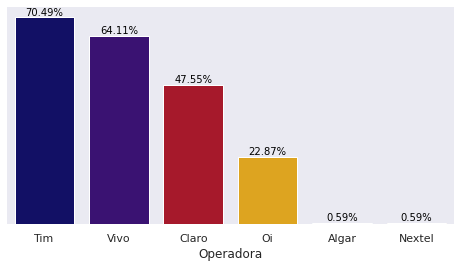

In [ ]:
# regiaoI.set_index([pd.Index(range(regiaoI.shape[0])), 'code_ibge'])
# regiaoI.sort_index(inplace=True)
vivo_rI = regiaoI[regiaoI.Vivo == 'X'].up.count()/regiaoI.shape[0]
tim_rI = regiaoI[regiaoI.TIM == 'X'].up.count()/regiaoI.shape[0]
oi_rI = regiaoI[regiaoI.Oi == 'X'].up.count()/regiaoI.shape[0]
claro_rI = regiaoI[regiaoI.Claro == 'X'].up.count()/regiaoI.shape[0]
algar_rI = regiaoI[regiaoI.Algar == 'X'].up.count()/regiaoI.shape[0]
nextel_rI = regiaoI[regiaoI.Nextel == 'X'].up.count()/regiaoI.shape[0]

values = [round(x*100, 2) for x in [vivo_rI, tim_rI, oi_rI, claro_rI, algar_rI, nextel_rI]]


fig, ax = plt.subplots(figsize=(8, 4))

# # remover grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# # remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)

#criar função para dar labels automaticamente
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
                    '{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2,  height),
                    xytext=(0, 0),  # offset
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=10,
                    color="black",
                    )
        
# plotar labels dentro das barras
# width_bar = 0.35

d = pd.DataFrame(data = [labels ,values]).transpose()
d.columns = ['labels', 'values']

d = d.reset_index().sort_values('values', ascending=False)
rects= ax.bar(np.arange(len(labels)) ,  d['values'])
autolabel(rects)

sns.barplot(x ='labels', y='values', data=d, palette=palette)  

plt.xlabel("Operadora")

In [ ]:
municipios
regiaoII.up.nunique()

11

Text(0.5, 0, 'Operadora')

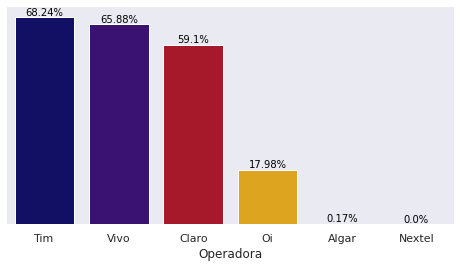

In [ ]:
vivo_rII = regiaoII[regiaoII.Vivo == 'X'].up.count()/regiaoII.shape[0]
tim_rII = regiaoII[regiaoII.TIM == 'X'].up.count()/regiaoII.shape[0]
oi_rII = regiaoII[regiaoII.Oi == 'X'].up.count()/regiaoII.shape[0]
claro_rII = regiaoII[regiaoII.Claro == 'X'].up.count()/regiaoII.shape[0]
algar_rII = regiaoII[regiaoII.Algar == 'X'].up.count()/regiaoII.shape[0]
nextel_rII = regiaoII[regiaoII.Nextel == 'X'].up.count()/regiaoII.shape[0]

# labels = ['Vivo', 'Tim', 'Claro', 'Algar', 'Nextel']
values = [round(x*100, 2) for x in [vivo_rII, tim_rII,oi_rII, claro_rII, algar_rII, nextel_rII]]


fig, ax = plt.subplots(figsize=(8, 4))

# # remover grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# # remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)

#criar função para dar labels automaticamente
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
                    '{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2,  height),
                    xytext=(0, 0),  # offset
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=10,
                    color="black",
                    )
        
# plotar labels dentro das barras
# width_bar = 0.35


d = pd.DataFrame(data = [labels ,values]).transpose()
d.columns = ['labels', 'values']
d = d.reset_index().sort_values('values', ascending=False)
rects= ax.bar(np.arange(len(labels)) ,  d['values'])
autolabel(rects)
sns.barplot(x ='labels', y='values', data=d, palette=palette)  

plt.xlabel("Operadora")

In [ ]:
regiaoII[regiaoII.Nextel == 'X']

In [ ]:
regiaoIII.shape[0]
regiaoIII.up.nunique()

Text(0.5, 0, 'Operadora')

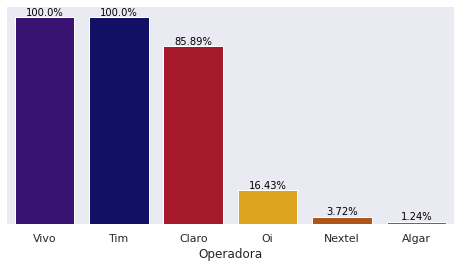

In [ ]:
vivo_rIII = regiaoIII[regiaoIII.Vivo == 'X'].up.count()/regiaoIII.shape[0]
tim_rIII = regiaoIII[regiaoIII.TIM == 'X'].up.count()/regiaoIII.shape[0]
oi_rIII = regiaoIII[regiaoIII.Oi == 'X'].up.count()/regiaoIII.shape[0]
claro_rIII = regiaoIII[regiaoIII.Claro == 'X'].up.count()/regiaoIII.shape[0]
algar_rIII = regiaoIII[regiaoIII.Algar == 'X'].up.count()/regiaoIII.shape[0]
nextel_rIII = regiaoIII[regiaoIII.Nextel == 'X'].up.count()/regiaoIII.shape[0]

# labels = ['Vivo', 'Tim', 'Claro', 'Algar', 'Nextel']
values = [round(x*100, 2) for x in [vivo_rIII, tim_rIII,oi_rIII, claro_rIII, algar_rIII, nextel_rIII]]


fig, ax = plt.subplots(figsize=(8, 4))

# # remover grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# # remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)

#criar função para dar labels automaticamente
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
                    '{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2,  height),
                    xytext=(0, 0),  # offset
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=10,
                    color="black",
                    )
        
# plotar labels dentro das barras
# width_bar = 0.35


d = pd.DataFrame(data = [labels ,values]).transpose()
d.columns = ['labels', 'values']
d = d.reset_index().sort_values('values', ascending=False)
rects= ax.bar(np.arange(len(labels)) ,  d['values'])
autolabel(rects)
sns.barplot(x ='labels', y='values', data=d, palette=palette)  
plt.xlabel("Operadora")

In [ ]:
regiapI_mais100k = municipios_mais100k.set_index('code_ibge').join(regiaoI.set_index('code_ibge'), how='inner')
# regiapI_mais100k.sort_index(inplace=True)

regiapII_mais100k = municipios_mais100k.set_index('code_ibge').join(regiaoII.set_index('code_ibge'), how='inner')
# regiapII_mais100k.sort_index(inplace=True)

regiapIII_mais100k = municipios_mais100k.set_index('code_ibge').join(regiaoIII.set_index('code_ibge'), how='inner')
# regiapIII_mais100k.sort_index(inplace=True)

regiapI_mais100k.shape[0] + regiapII_mais100k.shape[0] + regiapIII_mais100k.shape[0]

326

In [ ]:
# regiapI_mais100k


In [ ]:
regiapIII_mais100k

Text(0.5, 0, 'Operadora')

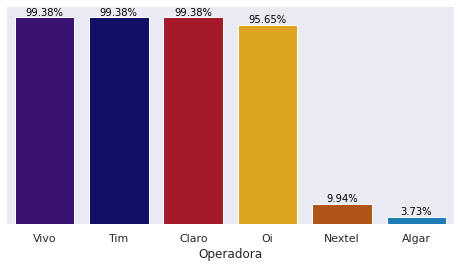

In [ ]:
vivo_rI = regiapI_mais100k[regiapI_mais100k.Vivo == 'X'].uf.count()/regiapI_mais100k.shape[0]
tim_rI = regiapI_mais100k[regiapI_mais100k.TIM == 'X'].uf.count()/regiapI_mais100k.shape[0]
oi_rI = regiapI_mais100k[regiapI_mais100k.Oi == 'X'].uf.count()/regiapI_mais100k.shape[0]
claro_rI = regiapI_mais100k[regiapI_mais100k.Claro == 'X'].uf.count()/regiapI_mais100k.shape[0]
algar_rI = regiapI_mais100k[regiapI_mais100k.Algar == 'X'].uf.count()/regiapI_mais100k.shape[0]
nextel_rI = regiapI_mais100k[regiapI_mais100k.Nextel == 'X'].uf.count()/regiapI_mais100k.shape[0]


values = [round(x*100, 2) for x in [vivo_rI, tim_rI, oi_rI, claro_rI, algar_rI, nextel_rI]]


fig, ax = plt.subplots(figsize=(8, 4))

# # remover grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# # remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)

#criar função para dar labels automaticamente
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
                    '{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2,  height),
                    xytext=(0, 0),  # offset
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=10,
                    color="black",
                    )
        
# plotar labels dentro das barras
# width_bar = 0.35


d = pd.DataFrame(data = [labels ,values]).transpose()
d.columns = ['labels', 'values']
d = d.reset_index().sort_values('values', ascending=False)
rects= ax.bar(np.arange(len(labels)) ,  d['values'])
autolabel(rects)
sns.barplot(x ='labels', y='values', data=d, palette=palette)  
plt.xlabel("Operadora")

In [ ]:
regiapI_mais100k[regiapI_mais100k.Claro != 'X']

Text(0.5, 0, 'Operadora')

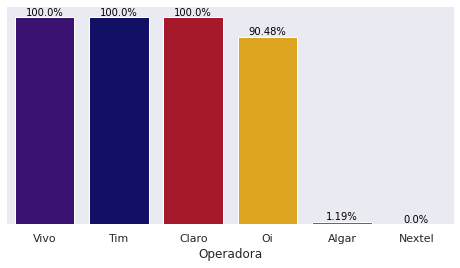

In [ ]:
vivo_rII = regiapII_mais100k[regiapII_mais100k.Vivo == 'X'].uf.count()/regiapII_mais100k.shape[0]
tim_rII = regiapII_mais100k[regiapII_mais100k.TIM == 'X'].uf.count()/regiapII_mais100k.shape[0]
oi_rII = regiapII_mais100k[regiapII_mais100k.Oi == 'X'].uf.count()/regiapII_mais100k.shape[0]
claro_rII = regiapII_mais100k[regiapII_mais100k.Claro == 'X'].uf.count()/regiapII_mais100k.shape[0]
algar_rII = regiapII_mais100k[regiapII_mais100k.Algar == 'X'].uf.count()/regiapII_mais100k.shape[0]
nextel_rII = regiapII_mais100k[regiapII_mais100k.Nextel == 'X'].uf.count()/regiapII_mais100k.shape[0]

# labels = ['Vivo', 'Tim', 'Claro', 'Algar', 'Nextel']
values = [round(x*100, 2) for x in [vivo_rII, tim_rII,oi_rII, claro_rII, algar_rII, nextel_rII]]

fig, ax = plt.subplots(figsize=(8, 4))

# # remover grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# # remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)

#criar função para dar labels automaticamente
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
                    '{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2,  height),
                    xytext=(0, 0),  # offset
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=10,
                    color="black",
                    )
        
# plotar labels dentro das barras
# width_bar = 0.35


d = pd.DataFrame(data = [labels ,values]).transpose()
d.columns = ['labels', 'values']
d = d.reset_index().sort_values('values', ascending=False)
rects= ax.bar(np.arange(len(labels)) ,  d['values'])
autolabel(rects)
sns.barplot(x ='labels', y='values', data=d, palette=palette)  
plt.xlabel("Operadora")

Text(0.5, 0, 'Operadora')

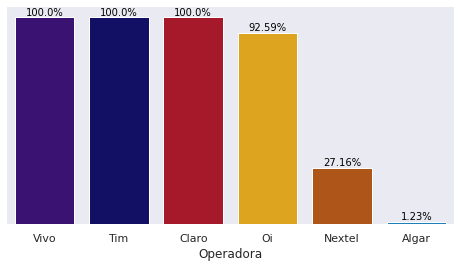

In [ ]:
vivo_rIII = regiapIII_mais100k[regiapIII_mais100k.Vivo == 'X'].uf.count()/regiapIII_mais100k.shape[0]
tim_rIII = regiapIII_mais100k[regiapIII_mais100k.TIM == 'X'].uf.count()/regiapIII_mais100k.shape[0]
oi_rIII = regiapIII_mais100k[regiapIII_mais100k.Oi == 'X'].uf.count()/regiapIII_mais100k.shape[0]
claro_rIII = regiapIII_mais100k[regiapIII_mais100k.Claro == 'X'].uf.count()/regiapIII_mais100k.shape[0]
algar_rIII = regiapIII_mais100k[regiapIII_mais100k.Algar == 'X'].uf.count()/regiapIII_mais100k.shape[0]
nextel_rIII = regiapIII_mais100k[regiapIII_mais100k.Nextel == 'X'].uf.count()/regiapIII_mais100k.shape[0]

# labels = ['Vivo', 'Tim', 'Claro', 'Algar', 'Nextel']
values = [round(x*100, 2) for x in [vivo_rIII, tim_rIII,oi_rIII, claro_rIII, algar_rIII, nextel_rIII]]

fig, ax = plt.subplots(figsize=(8, 4))

# # remover grids e eixos
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# # remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)

#criar função para dar labels automaticamente
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
                    '{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2,  height),
                    xytext=(0, 0),  # offset
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=10,
                    color="black",
                    )
        
# plotar labels dentro das barras
# width_bar = 0.35


d = pd.DataFrame(data = [labels ,values]).transpose()
d.columns = ['labels', 'values']
d = d.reset_index().sort_values('values', ascending=False)
rects= ax.bar(np.arange(len(labels)) ,  d['values'])
autolabel(rects)
sns.barplot(x ='labels', y='values', data=d, palette=palette)  
plt.xlabel("Operadora")

In [ ]:

# d = pd.DataFrame(data = [labels ,values]).transpose()
# d.columns = ['labels', 'values']
# d = d.reset_index().sort_values('values', ascending=False)
# sns.barplot(x ='labels', y='values', data=d, palette=palette)  


In [ ]:
# operadoras = operadoras.transpose()
op = operadoras.transpose()
new_header = op.iloc[0] #grab the first row for the header
op = op[1:] #take the data less the header row
op.columns = new_header #set the header row as the df header
op.rename(columns=operadoras.iloc[0])
op.drop(columns='Total', inplace=True)

Text(0.5, 0, 'Ano')

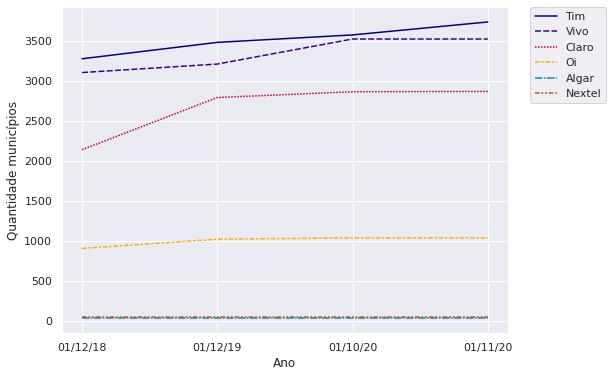

In [ ]:
op.index = ['01/12/18', '01/12/19', '01/10/20', '01/11/20']
plt.figure(figsize=(8,6))
sns.lineplot(data=op.apply(pd.to_numeric), palette=palette)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("Quantidade municípios") 
plt.xlabel("Ano")

In [ ]:
# sns.lineplot(y=op.TIM1, x=op.index)


In [ ]:
# pd.to_numeric(op)


#wef

In [ ]:
data_brazil = datawef[datawef['Country Name'] == 'Brazil']

In [ ]:
# data_brazil.drop(inplace=True, columns=['Country ISO3', 'Country Name', 'Indicator Id',
#        'Subindicator Type'] )

In [ ]:
data_brazil['Subindicator Type'].unique()

array(['Index (1-7)', 'Rank', '% software installed', '# procedures',
       'time', '% profits', '% enrollment', 'kWh/capita', '% population',
       'kb/s', 'per million pop.', '$/min', '$/month', 'Index (0-2)',
       '% adults', 'per 100 pop.', '% individuals', '% households',
       'Index (0-1)', '% workforce', 'Index'], dtype=object)

In [ ]:
# data_brazil[data_brazil['Subindicator Type'] == '']

In [ ]:
data_brazil[data_brazil['Subindicator Type'] == 'Index (1-7)']

,Country ISO3,Country Name,Indicator Id,Indicator,Subindicator Type,2012,2013,2014,2015,2016
2372,BRA,Brazil,3365,"Effectiveness of law-making bodies, 1-7 (best)",Index (1-7),2.737909,2.700909,2.586913,2.540074,2.397888
2374,BRA,Brazil,3367,"Laws relating to ICTs, 1-7 (best)",Index (1-7),4.449333,4.396980,4.174029,3.858725,3.741689
2376,BRA,Brazil,3369,"Judicial independence, 1-7 (best)",Index (1-7),3.736586,3.750626,3.867226,3.553158,3.380492
2378,BRA,Brazil,3371,Efficiency of legal system in settling dispute...,Index (1-7),3.497260,3.473185,3.301620,3.204778,2.766236
2380,BRA,Brazil,3373,Efficiency of legal system in challenging regs...,Index (1-7),3.659154,3.833737,3.509144,3.056239,2.937018
2382,BRA,Brazil,3375,"Intellectual property protection, 1-7 (best)",Index (1-7),3.222128,3.495448,3.539864,3.250404,3.675650
2390,BRA,Brazil,3383,"Availability of latest technologies, 1-7 (best)",Index (1-7),5.390267,5.319829,5.054831,4.711750,4.469284
2392,BRA,Brazil,3385,"Venture capital availability, 1-7 (=best)",Index (1-7),2.801857,2.821424,2.723249,2.571748,2.510984
2400,BRA,Brazil,3393,"Intensity of local competition, 1-7 (best)",Index (1-7),5.160945,5.140540,4.981935,5.271598,5.371110
2404,BRA,Brazil,3397,"Quality of management schools, 1-7 (best)",Index (1-7),4.295027,4.424541,4.542627,4.530422,3.952464


In [ ]:
data_brazil[data_brazil['Subindicator Type'] == '% profits']

,Country ISO3,Country Name,Indicator Id,Indicator,Subindicator Type,2012,2013,2014,2015,2016
2394,BRA,Brazil,3387,"Total tax rate, % profits",% profits,67.1,69.3,68.3,69.0,69.2


In [ ]:
data_brazil[data_brazil['Subindicator Type'] == 'time']

,Country ISO3,Country Name,Indicator Id,Indicator,Subindicator Type,2012,2013,2014,2015,2016
2388,BRA,Brazil,3381,No. days to enforce a contract,time,731.0,731.0,731.0,731.0,731.0
2396,BRA,Brazil,3389,No. days to start a business,time,119.0,119.0,107.5,83.6,83.0


In [ ]:
data_brazil[data_brazil['Subindicator Type'] == '% enrollment']

,Country ISO3,Country Name,Indicator Id,Indicator,Subindicator Type,2012,2013,2014,2015,2016
2402,BRA,Brazil,3395,"Tertiary education gross enrollment rate, %",% enrollment,36.07200,25.63098,25.63098,44.917746,45.102985
2426,BRA,Brazil,3419,"Secondary education gross enrollment rate, %",% enrollment,101.33981,105.83225,105.83225,NaN,99.350000


In [ ]:
data_brazil[data_brazil['Subindicator Type'] == '$/min']

,Country ISO3,Country Name,Indicator Id,Indicator,Subindicator Type,2012,2013,2014,2015,2016
2416,BRA,Brazil,3409,"Prepaid mobile cellular tariffs, PPP $/min.",$/min,0.72501,0.682755,0.649399,0.731392,0.310404


In [ ]:
data_brazil[data_brazil['Subindicator Type'] == '$/month']

,Country ISO3,Country Name,Indicator Id,Indicator,Subindicator Type,2012,2013,2014,2015,2016
2418,BRA,Brazil,3411,"Fixed broadband Internet tariffs, PPP $/month",$/month,17.601051,16.575231,15.7652,18.509965,17.619136


In [ ]:
data_brazil[data_brazil['Subindicator Type'] == '% workforce']

,Country ISO3,Country Name,Indicator Id,Indicator,Subindicator Type,2012,2013,2014,2015,2016
2466,BRA,Brazil,3461,"Knowledge-intensive jobs, % workforce",% workforce,19.309142,19.309142,20.504978,21.039651,21.625157


In [ ]:
data_brazil[data_brazil['Subindicator Type'] == 'kWh/capita']

,Country ISO3,Country Name,Indicator Id,Indicator,Subindicator Type,2012,2013,2014,2015,2016
2408,BRA,Brazil,3401,"Electricity production, kWh/capita",kWh/capita,2419.135268,2413.848295,2700.16827,2700.16827,2792.180258


In [ ]:
data_brazil[data_brazil['Subindicator Type'] == 'Rank']

,Country ISO3,Country Name,Indicator Id,Indicator,Subindicator Type,2012,2013,2014,2015,2016
2373,BRA,Brazil,3366,"Effectiveness of law-making bodies, 1-7 (best)",Rank,113.0,120.0,133.0,127.0,129.0
2375,BRA,Brazil,3368,"Laws relating to ICTs, 1-7 (best)",Rank,46.0,47.0,60.0,76.0,80.0
2377,BRA,Brazil,3370,"Judicial independence, 1-7 (best)",Rank,71.0,71.0,65.0,76.0,92.0
2379,BRA,Brazil,3372,Efficiency of legal system in settling dispute...,Rank,75.0,84.0,101.0,106.0,123.0
2381,BRA,Brazil,3374,Efficiency of legal system in challenging regs...,Rank,66.0,61.0,68.0,94.0,106.0
...,...,...,...,...,...,...,...,...,...,...
2497,BRA,Brazil,3492,8th pillar: Government usage,Rank,59.0,48.0,54.0,71.0,84.0
2499,BRA,Brazil,3494,D. Impact subindex,Rank,53.0,50.0,57.0,75.0,79.0
2501,BRA,Brazil,3496,9th pillar: Economic impacts,Rank,52.0,50.0,64.0,76.0,75.0
2503,BRA,Brazil,3498,10th pillar: Social impacts,Rank,54.0,48.0,58.0,73.0,77.0


In [ ]:
data_brazil[data_brazil['Subindicator Type'] == '% software installed']

,Country ISO3,Country Name,Indicator Id,Indicator,Subindicator Type,2012,2013,2014,2015,2016
2384,BRA,Brazil,3377,"Software piracy rate, % software installed",% software installed,54.0,53.0,53.0,50.0,50.0


In [ ]:
data_brazil[data_brazil['Subindicator Type'] == '% population']

,Country ISO3,Country Name,Indicator Id,Indicator,Subindicator Type,2012,2013,2014,2015,2016
2410,BRA,Brazil,3403,"Mobile network coverage, % pop.",% population,99.89,99.99,99.99,99.98,99.98


In [ ]:
data_brazil[data_brazil['Subindicator Type'] == 'per million pop.']

,Country ISO3,Country Name,Indicator Id,Indicator,Subindicator Type,2012,2013,2014,2015,2016
2414,BRA,Brazil,3407,Secure Internet servers/million pop.,per million pop.,40.734259,54.196432,54.284789,57.446044,68.634240
2446,BRA,Brazil,3441,"PCT patents, applications/million pop.",per million pop.,2.749363,2.807343,3.038518,3.479021,3.449393
2462,BRA,Brazil,3457,"ICT PCT patents, applications/million pop.",per million pop.,0.336181,0.356096,0.383748,0.521228,0.522120


In [ ]:
data_brazil[data_brazil['Subindicator Type'] == 'kb/s']

,Country ISO3,Country Name,Indicator Id,Indicator,Subindicator Type,2012,2013,2014,2015,2016
2412,BRA,Brazil,3405,"Int'l Internet bandwidth, kb/s per user",kb/s,12.618975,28.024259,44.837,42.94554,42.965886


In [ ]:
data_brazil[data_brazil['Subindicator Type'] == '% adults']

,Country ISO3,Country Name,Indicator Id,Indicator,Subindicator Type,2012,2013,2014,2015,2016
2428,BRA,Brazil,3421,"Adult literacy rate, %",% adults,90.03662,90.29821,90.379177,92.58371,92.58371


In [ ]:
data_brazil[data_brazil['Subindicator Type'] == '% households']

,Country ISO3,Country Name,Indicator Id,Indicator,Subindicator Type,2012,2013,2014,2015,2016
2434,BRA,Brazil,3427,"Households w/ personal computer, %",% households,34.86,45.41,49.920,48.8,51.95
2436,BRA,Brazil,3429,"Households w/ Internet access, %",% households,27.06,37.84,45.374,42.4,48.00


In [ ]:
data_brazil.set_index(data_brazil.Indicator, inplace=True)


In [ ]:
data_brazil.drop(inplace=True, columns=['Country ISO3', 'Country Name', 'Indicator Id',
       'Subindicator Type','Indicator'] )

In [ ]:
data_brazil

,2012,2013,2014,2015,2016
Indicator,,,,,
"Effectiveness of law-making bodies, 1-7 (best)",2.737909,2.700909,2.586913,2.540074,2.397888
"Effectiveness of law-making bodies, 1-7 (best)",113.000000,120.000000,133.000000,127.000000,129.000000
"Laws relating to ICTs, 1-7 (best)",4.449333,4.396980,4.174029,3.858725,3.741689
"Laws relating to ICTs, 1-7 (best)",46.000000,47.000000,60.000000,76.000000,80.000000
"Judicial independence, 1-7 (best)",3.736586,3.750626,3.867226,3.553158,3.380492
...,...,...,...,...,...
9th pillar: Economic impacts,52.000000,50.000000,64.000000,76.000000,75.000000
10th pillar: Social impacts,3.931414,4.079689,3.935301,4.034055,3.935196
10th pillar: Social impacts,54.000000,48.000000,58.000000,73.000000,77.000000


In [ ]:
eletri_prod = data_brazil[data_brazil.index == 'Electricity production, kWh/capita'][1:].transpose()
eletri_prod

Indicator,"Electricity production, kWh/capita"
2012,72.0
2013,73.0
2014,73.0
2015,71.0
2016,68.0


In [ ]:
# sns.lineplot(data=eletri_prod)
# local_competi

Text(0.5, 0, 'Ano')

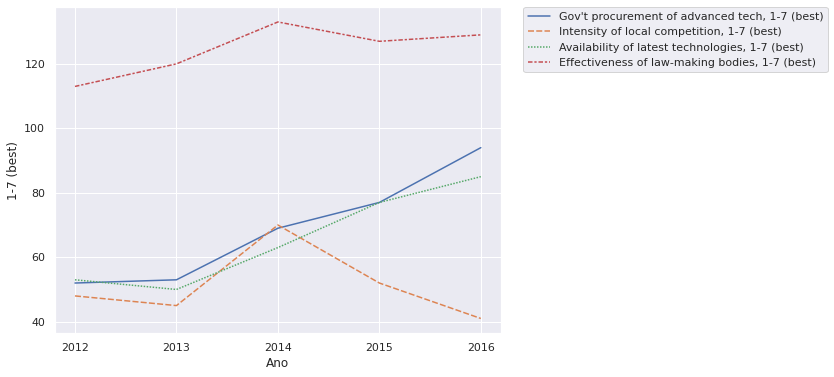

In [ ]:
#country metrics
# eletri_prod = data_brazil[data_brazil.index == 'Electricity production, kWh/capita'][1:].transpose()
gov_advanced = data_brazil[data_brazil.index == "Gov't procurement of advanced tech, 1-7 (best)"][1:].transpose()
local_competi = data_brazil[data_brazil.index == 'Intensity of local competition, 1-7 (best)'][1:].transpose()
# no_proce_business = data_brazil[data_brazil.index == 'No. procedures to start a business'][1:].transpose()
latest_tech = data_brazil[data_brazil.index == 'Availability of latest technologies, 1-7 (best)'][1:].transpose()
efec_low = data_brazil[data_brazil.index == 'Effectiveness of law-making bodies, 1-7 (best)'][1:].transpose()
dt = pd.concat([ 
  gov_advanced, 
  local_competi, 
  # no_proce_business, 
  latest_tech, 
  efec_low
  ], axis=1)
dt

plt.figure(figsize=(8,6))
sns.lineplot(data=dt)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel("1-7 (best)") 
plt.xlabel("Ano")

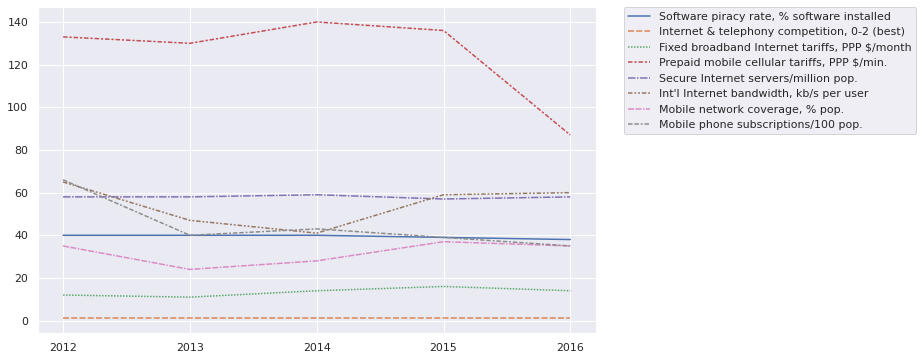

In [ ]:
#networkd metrics
piracy_rate = data_brazil[data_brazil.index == 'Software piracy rate, % software installed'][1:].transpose()
int_tele_compet = data_brazil[data_brazil.index == 'Internet & telephony competition, 0-2 (best)'][1:].transpose()
broadband = data_brazil[data_brazil.index == 'Fixed broadband Internet tariffs, PPP $/month'][1:].transpose()
mobile_tariffs = data_brazil[data_brazil.index == 'Prepaid mobile cellular tariffs, PPP $/min.'][1:].transpose()
secure_internet = data_brazil[data_brazil.index == 'Secure Internet servers/million pop.'][1:].transpose()
internet_bandwidth = data_brazil[data_brazil.index == "Int'l Internet bandwidth, kb/s per user"][1:].transpose()
mobile_cober = data_brazil[data_brazil.index == 'Mobile network coverage, % pop.'][1:].transpose()
mobile_sub = data_brazil[data_brazil.index == 'Mobile phone subscriptions/100 pop.'][1:].transpose()
dt = pd.concat([ piracy_rate, int_tele_compet, broadband, mobile_tariffs, secure_internet, internet_bandwidth, mobile_cober,mobile_sub], axis=1)
dt

plt.figure(figsize=(10,6))

# sns.set_theme(style="darkgrid")
sns.lineplot(data=dt)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


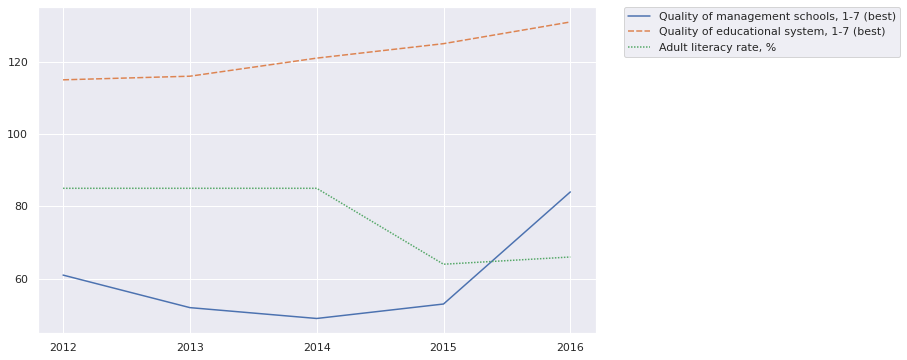

In [ ]:
#education metrics
# adult_literacy = data_brazil[data_brazil['Indicator'] == '']
quanlity_manag_schol = data_brazil[data_brazil.index == 'Quality of management schools, 1-7 (best)'][1:].transpose()
quanlity_education = data_brazil[data_brazil.index == 'Quality of educational system, 1-7 (best)'][1:].transpose()
adult_literacy = data_brazil[data_brazil.index == 'Adult literacy rate, %'][1:].transpose()
dt = pd.concat([ quanlity_manag_schol, quanlity_education, adult_literacy], axis=1)
dt
plt.figure(figsize=(10,6))
sns.lineplot(data=dt)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
